<a href="https://colab.research.google.com/github/11daniel/CSINTSY/blob/main/CSMODEL_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Group 6] Case Study: Phase 1
* Clemente, Daniel Gavrie
* Lacson, Reever Mikael S.
* Lopez, Ghee Kaye
* Sescon, Hans Jared

## Dataset Description

### Brief Description of the Dataset

This dataset by Reihaneh Namdari from Kaggle.com is comprised of breast cancer patient data from the SEER Program of the National Cancer Institute (NCI), specifically from the November 2017 update. It includes information on female patients diagnosed with infiltrating duct and lobular carcinoma (histology code 8522/3) between 2006 and 2010. To ensure data quality, patients with unknown tumor size, examined regional lymph nodes (LNs), positive regional LNs, or survival duration of less than one month were excluded. The final dataset contains 4024 patients.

### Data Collection Process

The dataset is obtained from a 2017 November update of the Surveillance, Epidemiology, and End Results (SEER) Program, which is a program that provides information on cancer statistics to reduce the cancer burden among the U.S. population. Data on cancer incidence and survival are gathered by SEER from population-based cancer registries that include about 48% of the U.S. population.

An implication of SEER's comprehensive, population-based data collection is the reliable statistics on breast cancer, which makes evidence-based insights on the data more robust. However, another implication is that its focus on U.S. populations may limit the generalizability of findings to other regions.

### Structure of the Dataset

For the structure of the dataset, it is comprised of rows and columns. Each row in the dataset represents an individual breast cancer patient. For the columns, each represents a specific variable related to the patient and their cancer.  There are **4024 observations** and **16 variables** in the dataset.

*The description of each variable present in the dataset is discussed in the next section.*

### Variables in the Dataset

- **Age**: Age of the patient.
- **Race**: Race of the patient.
- **Marital Status**: Marital status of the patient.
- **T Stage**: Describes the main (primary) tumor's size and if it has spread to the skin or to the chest wall under the breast. Higher T numbers mean a larger tumor and/or wider spread to tissues near the breast.
- **N Stage**: Indicates whether the cancer has spread to lymph nodes near the breast and, if so, how many lymph nodes are involved.
- **6th Stage**: Overall stage of cancer based on the 6th edition of the AJCC Cancer Staging Manual.
- **Differentiate**: Indicates how much the cancer cells resemble normal cells.
- **Grade**: Describes how normal or abnormal cancer cells look under a microscope. The higher the grade, the more abnormal the cells look and the faster it is likely to grow and spread.
- **Tumor Size**: Size of the tumor in millimeters.
- **Estrogen Status**: Breast cancers that have estrogen receptors (Positive/Negative).
- **Progesterone Status**: Breast cancers with progesterone receptors (Positive/Negative).
- **Regional Node Examined**:  Records the total number of regional lymph nodes that were removed and examined by the pathologist.
- **Regional Node Positive**: Records the exact number of regional lymph nodes examined by the pathologist that were found to contain metastases.
- **Survival Months**: Number of months the patient survived after diagnosis.
- **Status**: Current status of the patient (Dead/Alive).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

Imported important and necessary libraries for the notebook.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import pearsonr
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from scipy.stats import chi2_contingency
from tabulate import tabulate

# **Data Cleaning**

Inspected and read the data.

In [ ]:
# Step 1: Inspect the data
cancer = pd.read_csv('/content/drive/Shareddrives/CSMODEL MCO/Breast_Cancer.csv') #https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Get the data type information about the dataset.

In [ ]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cancer.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


Drop missing data or rows with missing values

In [ ]:
# Step 2: Handle missing data
cancer.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Remove duplicates

In [ ]:
# Step 3: Remove duplicates
cancer.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cancer.columns = cancer.columns.str.strip().str.replace(' ', '_')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sort dataframe by `Age`

In [ ]:
sorted_cancer = cancer.sort_values('Age')
sorted_cancer = sorted_cancer[~sorted_cancer.apply(lambda row: row.astype(str).str.contains('Dead').any(), axis=1)]
sorted_cancer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Status
1544,30,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,16,1,69,Alive
702,30,White,Single,T2,N2,IIIA,Moderately differentiated,2,Regional,28,Positive,Positive,19,7,74,Alive
3310,30,Other,Married,T2,N1,IIB,Moderately differentiated,2,Regional,25,Positive,Positive,15,3,78,Alive
1663,31,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,10,Positive,Positive,13,1,61,Alive
1668,31,Other,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,80,Positive,Positive,11,1,61,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,69,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,18,Positive,Positive,13,1,78,Alive
429,69,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,10,1,99,Alive
2355,69,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,85,Positive,Positive,30,1,68,Alive
2356,69,White,Divorced,T1,N1,IIA,Moderately differentiated,2,Regional,12,Positive,Positive,9,1,106,Alive


In [ ]:
sorted_cancer.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Status
1544,30,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,16,1,69,Alive
702,30,White,Single,T2,N2,IIIA,Moderately differentiated,2,Regional,28,Positive,Positive,19,7,74,Alive
3310,30,Other,Married,T2,N1,IIB,Moderately differentiated,2,Regional,25,Positive,Positive,15,3,78,Alive
1663,31,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,10,Positive,Positive,13,1,61,Alive
1668,31,Other,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,80,Positive,Positive,11,1,61,Alive


In [ ]:
sorted_cancer.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Race,Marital_Status,T_Stage,N_Stage,6th_Stage,differentiate,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Status
2189,69,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,18,Positive,Positive,13,1,78,Alive
429,69,White,Married,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,10,1,99,Alive
2355,69,White,Married,T3,N1,IIIA,Moderately differentiated,2,Regional,85,Positive,Positive,30,1,68,Alive
2356,69,White,Divorced,T1,N1,IIA,Moderately differentiated,2,Regional,12,Positive,Positive,9,1,106,Alive
2154,69,White,Married,T1,N1,IIA,Well differentiated,1,Regional,16,Positive,Positive,2,1,78,Alive


In [ ]:
sorted_cancer.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Age,Tumor_Size,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months
count,3407.000000,3407.000000,3407.000000,3407.000000,3407.000000
mean,53.756384,29.272380,14.238920,3.601409,75.946874
std,8.808290,20.305066,8.023884,4.375595,19.386293
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,15.000000,9.000000,1.000000,61.000000
50%,54.000000,23.000000,14.000000,2.000000,77.000000
75%,61.000000,35.000000,19.000000,4.000000,92.000000
max,69.000000,140.000000,61.000000,41.000000,107.000000


In [ ]:
sorted_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3407 entries, 1544 to 2154
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3407 non-null   int64 
 1   Race                    3407 non-null   object
 2   Marital_Status          3407 non-null   object
 3   T_Stage                 3407 non-null   object
 4   N_Stage                 3407 non-null   object
 5   6th_Stage               3407 non-null   object
 6   differentiate           3407 non-null   object
 7   Grade                   3407 non-null   object
 8   A_Stage                 3407 non-null   object
 9   Tumor_Size              3407 non-null   int64 
 10  Estrogen_Status         3407 non-null   object
 11  Progesterone_Status     3407 non-null   object
 12  Regional_Node_Examined  3407 non-null   int64 
 13  Reginol_Node_Positive   3407 non-null   int64 
 14  Survival_Months         3407 non-null   int64 
 15  Status

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Explaratory Data Analysis**

### At what age do women have breast cancer?

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Ages of women who have breast cancer')

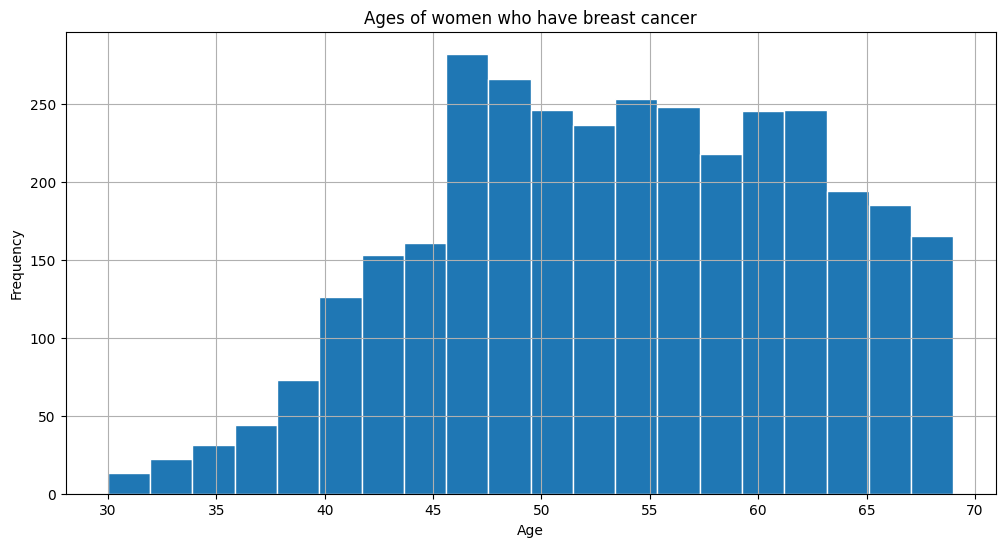

In [ ]:
#analyze data on age of women who have breast cancer
sorted_cancer.hist('Age', bins=20, edgecolor='w', figsize=(12,6))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages of women who have breast cancer')

In [ ]:
agg = sorted_cancer.agg({'Age': ['mean', 'median', 'std']})

age_mean = agg.loc['mean'][0]
age_median = agg.loc['median'][0]
age_std = agg.loc['std'][0]

print('Age Mean: {:.4f}'.format(age_mean))
print('Age Median: {:.4f}'.format(age_median))
print('Age Standard Deviation: {:.4f}'.format(age_std))

Age Mean: 53.7564
Age Median: 54.0000
Age Standard Deviation: 8.8083


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The mean age for women that have breast cancer is around `54 years old`. The peaks in the histogram may suggest that most women get diagnosed with breast cancer at around `50-60 years old`.

### Which hormones are present in the cancer cells

To find out which hormone receptors are present in the cancer cells of the people in the data, we must place the status of both `Estrogen` and `Progesterone` in a contingency table and display the data into a heatmap to better visualize the data.

In [ ]:
contingency_table = pd.crosstab(sorted_cancer['Progesterone_Status'], sorted_cancer['Estrogen_Status'])
contingency_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Estrogen_Status,Negative,Positive
Progesterone_Status,,
Negative,140,354
Positive,21,2892


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


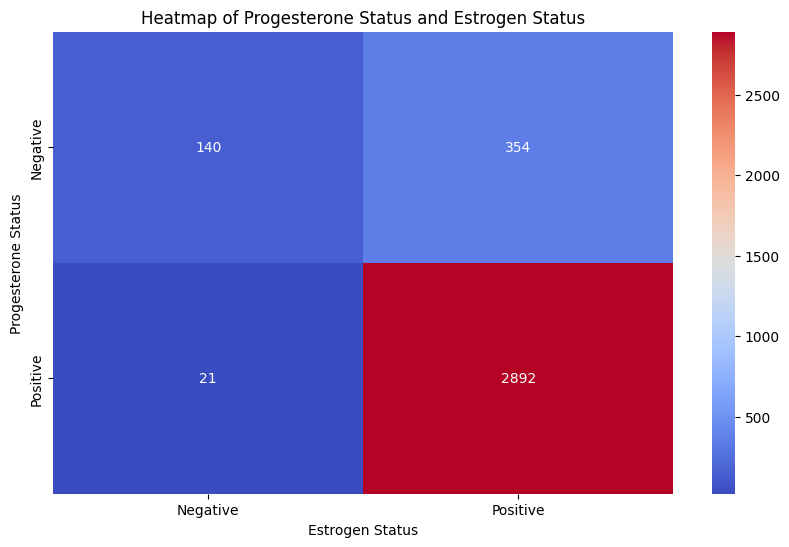

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Progesterone Status and Estrogen Status')
plt.xlabel('Estrogen Status')
plt.ylabel('Progesterone Status')
plt.show()

The heatmap shows that both `Estrogen` and `Progesterone` receptors are present in most of the people that are diagnosed with cancer. While others only have `Estrogen` receptors present, and some only have `Progesterone` receptors present or none at all.

### What numerical values affect `Tumor Size`?

To begin, let us see if there is a relationship between `Tumor Size` and `Survival Months`.

In [ ]:
lower_bound = sorted_cancer['Tumor_Size'].quantile(0.01)
upper_bound = sorted_cancer['Tumor_Size'].quantile(0.99)
data_cleaned = sorted_cancer[(cancer['Tumor_Size'] >= lower_bound) & (sorted_cancer['Tumor_Size'] <= upper_bound)]

lower_bound = data_cleaned['Survival_Months'].quantile(0.01)
upper_bound = data_cleaned['Survival_Months'].quantile(0.99)
data_cleaned = data_cleaned[(data_cleaned['Survival_Months'] >= lower_bound) & (data_cleaned['Survival_Months'] <= upper_bound)]


# Min-Max normalization function
def normalize(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Normalize the cleaned data
data_cleaned['Normalized Tumor Size'] = normalize(data_cleaned, 'Tumor_Size')
data_cleaned['Normalized Survival Months'] = normalize(data_cleaned, 'Survival_Months')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-eadf6f59cc44>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned = sorted_cancer[(cancer['Tumor_Size'] >= lower_bound) & (sorted_cancer['Tumor_Size'] <= upper_bound)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


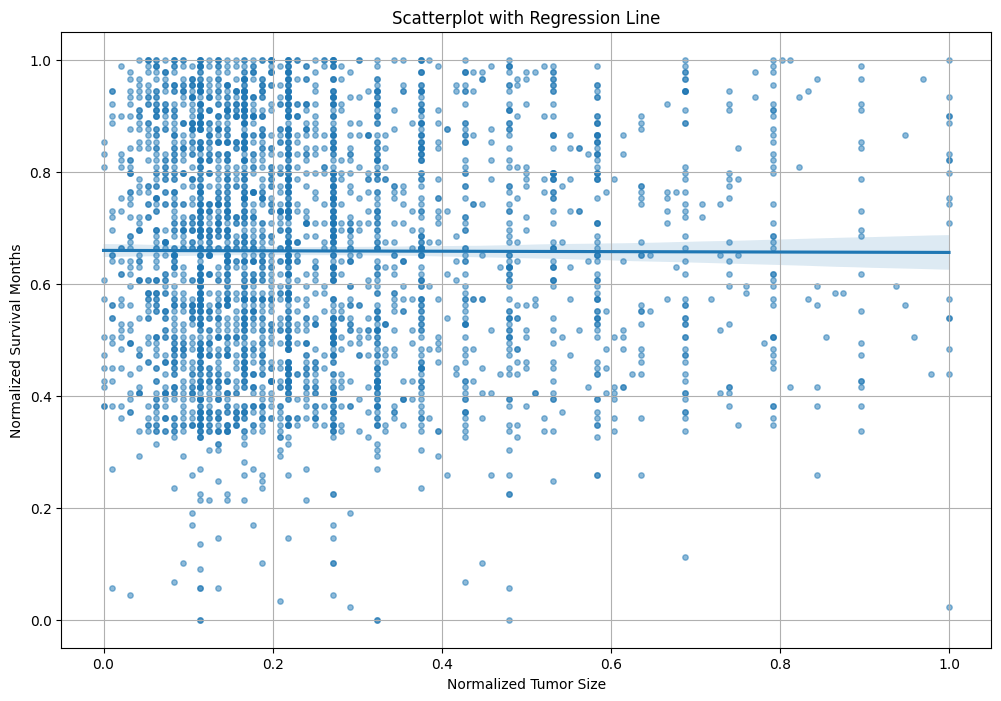

(-0.0033633212754933385, 0.8463949244654183)

In [ ]:
# Calculate Pearson correlation coefficient
pearson_corr, p_value = pearsonr(data_cleaned['Normalized Tumor Size'], data_cleaned['Normalized Survival Months'])

# Create scatterplot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(
    x='Normalized Tumor Size',
    y='Normalized Survival Months',
    data=data_cleaned,
    scatter_kws={'alpha': 0.5, 's': 15}  # 's' sets the size of the points
)
plt.title('Scatterplot with Regression Line')
plt.xlabel('Normalized Tumor Size')
plt.ylabel('Normalized Survival Months')
plt.grid(True)
plt.show()

pearson_corr, p_value

In [ ]:
tSize_sMonths = data_cleaned[['Tumor_Size', 'Survival_Months']]
tSize_sMonths.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tumor_Size,Survival_Months
Tumor_Size,1.000000,-0.003363
Survival_Months,-0.003363,1.000000


Based on the scatter plot and correlation matrix, we can conclude that there is weak negative correlation between `Tumor Size` and `Survival Months`. This means that as `Tumor Size` increases, there is a slight decrease in `Survival Months` of a person.

However, since the correlation matrix shows that the negative correlation is close to 0. This means that `Tumor Size` alone doesn't strongly affect one's `Survival Months` and that other factors may strongly affect one's `Survival Months`.

Now, we will now check if there is a relationship between `Tumor Size` and `Reigonal Node Positive`.

In [ ]:
lower_bound = sorted_cancer['Tumor_Size'].quantile(0.01)
upper_bound = sorted_cancer['Tumor_Size'].quantile(0.99)
data_cleaned = sorted_cancer[(cancer['Tumor_Size'] >= lower_bound) & (sorted_cancer['Tumor_Size'] <= upper_bound)]

lower_bound = data_cleaned['Reginol_Node_Positive'].quantile(0.01)
upper_bound = data_cleaned['Reginol_Node_Positive'].quantile(0.99)
data_cleaned = data_cleaned[(data_cleaned['Reginol_Node_Positive'] >= lower_bound) & (data_cleaned['Reginol_Node_Positive'] <= upper_bound)]

data_cleaned['Normalized Tumor Size'] = normalize(data_cleaned, 'Tumor_Size')
data_cleaned['Normalized Reginol Node Positive'] = normalize(data_cleaned, 'Reginol_Node_Positive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-21-33a320048084>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned = sorted_cancer[(cancer['Tumor_Size'] >= lower_bound) & (sorted_cancer['Tumor_Size'] <= upper_bound)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


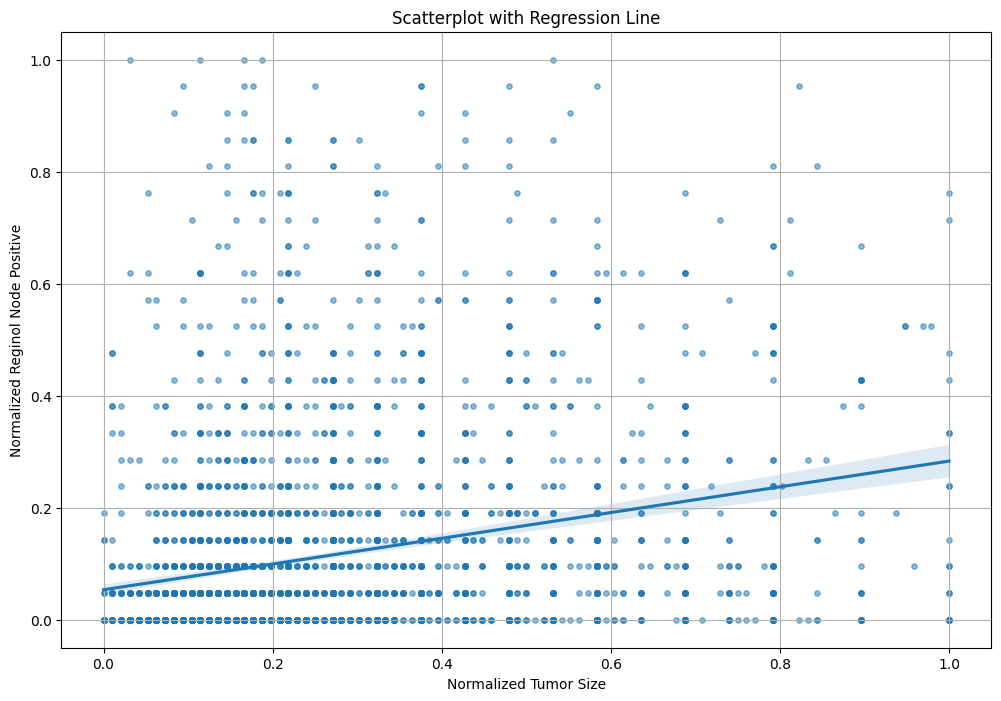

(0.2506197801838162, 1.0054887524309364e-48)

In [ ]:
pearson_corr, p_value = pearsonr(data_cleaned['Normalized Tumor Size'], data_cleaned['Normalized Reginol Node Positive'])

# Create scatterplot with regression line
plt.figure(figsize=(12, 8))
sns.regplot(
    x='Normalized Tumor Size',
    y='Normalized Reginol Node Positive',
    data=data_cleaned,
    scatter_kws={'alpha': 0.5, 's': 15}  # 's' sets the size of the points
)
plt.title('Scatterplot with Regression Line')
plt.xlabel('Normalized Tumor Size')
plt.ylabel('Normalized Reginol Node Positive')
plt.grid(True)
plt.show()

pearson_corr, p_value

In [ ]:
tSize_rNodePositive = data_cleaned[['Tumor_Size', 'Reginol_Node_Positive']]
tSize_rNodePositive.corr()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tumor_Size,Reginol_Node_Positive
Tumor_Size,1.00000,0.25062
Reginol_Node_Positive,0.25062,1.00000


The correlation matrix and the scatter plot suggest that there is a weak positive correlation between `Tumor Size` and `Regional Node Positive`. This means that as `Tumor Size` increases, so does the number of examined lymph nodes that contain metastases.

# **Research Question**

How does the combination of estrogen and progesterone receptor status affect the survival outcomes of breast cancer patients?

### Connection to Exploratory Data Analysis (EDA)

During the exploratory data analysis, we generated a contingency table and a heatmap to understand the distribution of estrogen and progesterone receptor statuses among the breast cancer patients. This analysis highlighted distinct patterns in hormone receptor status combinations, such as patients being positive for both receptors, negative for both, or mixed statuses.


Given the known impact of hormone receptor status on breast cancer treatment and prognosis, these initial insights prompt a deeper investigation into how these combinations specifically affect survival outcomes.

### Importance and Significance

Understanding how the combination of estrogen and progesterone receptor statuses affects survival outcomes is critical for several reasons:

1. **Treatment Optimization**
    
  Tailoring hormone therapies based on receptor status can lead to more effective and personalized treatment plans.

2. **Resource Allocation**

  Identifying high-risk groups can help allocate healthcare resources more efficiently, ensuring that patients who need more intensive treatment and monitoring receive it.

3. **Improved Prognosis**
  
  Enhanced prognostic models incorporating hormone receptor status can provide patients with better-informed prognostic information, helping in decision-making and planning.

4. **Research and Development**

  The findings can stimulate further research into the mechanisms underlying the different survival outcomes associated with hormone receptor statuses, potentially leading to the development of new therapeutic strategies.


## References

American Cancer Society. (n.d.). *Breast cancer hormone receptor status*. Retrieved from [https://www.cancer.org/cancer/types/breast-cancer/understanding-a-breast-cancer-diagnosis/breast-cancer-hormone-receptor-status.html](https://www.cancer.org/cancer/types/breast-cancer/understanding-a-breast-cancer-diagnosis/breast-cancer-hormone-receptor-status.html)

American Cancer Society. (n.d.). *Stages of breast cancer*. Retrieved from [https://www.cancer.org/cancer/types/breast-cancer/understanding-a-breast-cancer-diagnosis/stages-of-breast-cancer.html](https://www.cancer.org/cancer/types/breast-cancer/understanding-a-breast-cancer-diagnosis/stages-of-breast-cancer.html)

Cuyún Carter G, Mohanty M, Stenger K, Morato Guimaraes C, Singuru S, Basa P, Singh S, Tongbram V, Kuemmel S, Guarneri V, Tolaney SM. Prognostic Factors in Hormone Receptor-Positive/Human Epidermal Growth Factor Receptor 2-Negative (HR+/HER2-) Advanced Breast Cancer: A Systematic Literature Review. Cancer Manag Res. 2021 Aug 20;13:6537-6566. doi: 10.2147/CMAR.S300869. PMID: 34447271; PMCID: PMC8384149.

IEEE DataPort. (n.d.). *SEER breast cancer data*. Retrieved from [https://ieee-dataport.org/open-access/seer-breast-cancer-data](https://ieee-dataport.org/open-access/seer-breast-cancer-data)

Kaggle. (n.d.). *Breast cancer dataset*. Retrieved from [https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/data](https://www.kaggle.com/datasets/reihanenamdari/breast-cancer/data)

National Cancer Institute. (n.d.). *SEER cancer statistics*. Retrieved from [https://seer.cancer.gov/about/overview.html](https://seer.cancer.gov/about/overview.html)

National Cancer Institute. (n.d.). *Tumor grade*. Retrieved from [https://www.cancer.gov/about-cancer/diagnosis-staging/diagnosis/tumor-grade](https://www.cancer.gov/about-cancer/diagnosis-staging/diagnosis/tumor-grade)

Sebastian W, Forchette L, Donoughe K, Lun Y, Verma A, Liu T. Genetics, Treatment, and New Technologies of Hormone Receptor-Positive Breast Cancer. Cancers (Basel). 2023 Feb 18;15(4):1303. doi: 10.3390/cancers15041303. PMID: 36831644; PMCID: PMC9954687.

# **Phase 2**

## Data Binning Process

In this section, we will categorize the `Survival_Months` into two groups: "Short" and "Long" survival months. This binning is done to simplify the analysis by grouping similar data points together.

To determine the threshold between these two categories, we used the median value of the `Survival_Months` column.

In [ ]:
# Calculate the median value of the Survival_Months column
median_value = sorted_cancer['Survival_Months'].median()

# Print the value
print(median_value)

77.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using the pd.cut function, the survival months were binned into "Short" and "Long" categories using the median value as the cutoff. This method groups survival times below or equal to the median as "Short" and those above as "Long".

In [ ]:
# Create a new column 'Survival_Category' based on the median value
sorted_cancer['Survival_Category'] = pd.cut(
    sorted_cancer['Survival_Months'],
    bins=[-float('inf'), median_value, float('inf')],
    labels=['Short', 'Long']
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


To verify the binning, we display the first few rows showing survival months categorized as "Short" or "Long".

In [ ]:
# Display the first few rows to verify the binning
print(sorted_cancer[['Survival_Months', 'Survival_Category']].head())

long_survivors = sorted_cancer[sorted_cancer['Survival_Category'] == 'Long'].shape[0]
short_survivors = sorted_cancer[sorted_cancer['Survival_Category'] == 'Short'].shape[0]

# Display the counts
print("Long Survivors:", long_survivors)
print("Short Survivors:", short_survivors)

      Survival_Months Survival_Category
1544               69             Short
702                74             Short
3310               78              Long
1663               61             Short
1668               61             Short
Long Survivors: 1654
Short Survivors: 1753


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-27-9938ee0f4459>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')


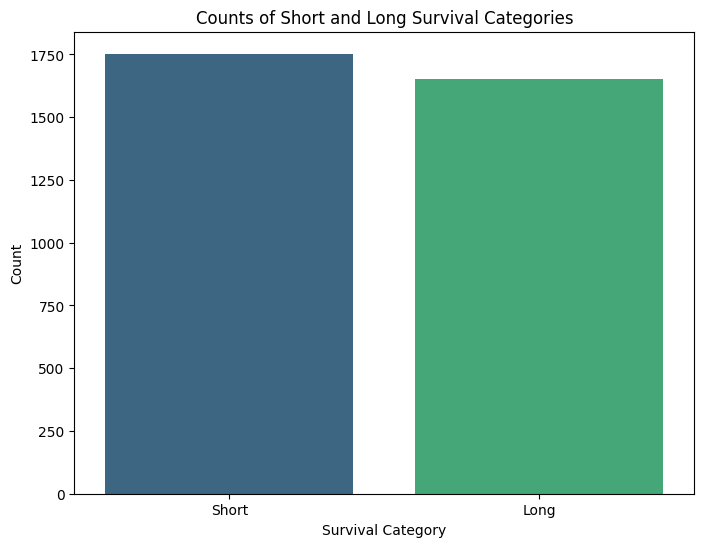

In [ ]:
# Bar chart for counts of survival categories
survival_counts = sorted_cancer['Survival_Category'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')
plt.title('Counts of Short and Long Survival Categories')
plt.xlabel('Survival Category')
plt.ylabel('Count')
plt.show()

# Data Modelling

### Association Rule Mining

In this section, we will use association rule mining to uncover relationships between estrogen and progesterone statuses and survival outcomes. This method helps in identifying patterns and associations that can provide valuable insights into the data.

#### Data Preprocessing

To facilitate the analysis, we categorize the survival status of patients into two groups: "Survived" and "Not_Survived." This categorization is based on whether the `Status` column contains the string 'Alive'.

In [ ]:
# Filter the DataFrame to include only rows where Status contains 'Dead'
complete_cancer = cancer.sort_values('Age')
complete_cancer.head()

complete_cancer['Survival_Outcome'] = complete_cancer['Status'].apply(
    lambda x: 'Survived' if 'Alive' in x else 'Not_Survived'
)

# Display the first few rows to verify the new column with a clear table format
print("Verification of Survival_Outcome Column:")
display(complete_cancer[['Status', 'Survival_Outcome']].head(10))


Verification of Survival_Outcome Column:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Status,Survival_Outcome
1544,Alive,Survived
702,Alive,Survived
3310,Alive,Survived
1888,Dead,Not_Survived
938,Dead,Not_Survived
1663,Alive,Survived
1668,Alive,Survived
66,Dead,Not_Survived
3711,Dead,Not_Survived
1320,Dead,Not_Survived


We convert the relevant columns (`Estrogen_Status`, `Progesterone_Status`, `Survival_Outcome`) into a list of transactions. Each transaction is a list of strings formatted as `column_value`.

In [ ]:
# Convert the relevant columns into a list of transactions
transactions = complete_cancer[['Estrogen_Status', 'Progesterone_Status', 'Survival_Outcome']].apply(
    lambda x: [f'{col}_{val}' for col, val in x.items()], axis=1
).tolist()

# Convert list of transactions to a DataFrame for better visualization
transactions_df = pd.DataFrame(transactions, columns=['Estrogen_Status', 'Progesterone_Status', 'Survival_Outcome'])

# Display sample transactions - showing the first 20 transactions
print("\nSample Transactions:")
display(transactions_df.head(20))


Sample Transactions:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Estrogen_Status,Progesterone_Status,Survival_Outcome
0,Estrogen_Status_Positive,Progesterone_Status_Positive,Survival_Outcome_Survived
1,Estrogen_Status_Positive,Progesterone_Status_Positive,Survival_Outcome_Survived
2,Estrogen_Status_Positive,Progesterone_Status_Positive,Survival_Outcome_Survived
3,Estrogen_Status_Negative,Progesterone_Status_Negative,Survival_Outcome_Not_Survived
4,Estrogen_Status_Negative,Progesterone_Status_Negative,Survival_Outcome_Not_Survived
5,Estrogen_Status_Positive,Progesterone_Status_Positive,Survival_Outcome_Survived
6,Estrogen_Status_Positive,Progesterone_Status_Positive,Survival_Outcome_Survived
7,Estrogen_Status_Positive,Progesterone_Status_Positive,Survival_Outcome_Not_Survived
8,Estrogen_Status_Negative,Progesterone_Status_Negative,Survival_Outcome_Not_Survived
9,Estrogen_Status_Positive,Progesterone_Status_Negative,Survival_Outcome_Not_Survived


We use the `TransactionEncoder` to convert the list of transactions into a binary matrix. Each row in the matrix represents a transaction, and each column represents a possible item, with binary values indicating presence or absence.

In [ ]:
# Encode the transactions into a binary matrix
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first 20 rows of the binary matrix in a clean table format
print("Binary Matrix Display:")
display(df.head(20))

Binary Matrix Display:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Estrogen_Status_Negative,Estrogen_Status_Positive,Progesterone_Status_Negative,Progesterone_Status_Positive,Survival_Outcome_Not_Survived,Survival_Outcome_Survived
0,False,True,False,True,False,True
1,False,True,False,True,False,True
2,False,True,False,True,False,True
3,True,False,True,False,True,False
4,True,False,True,False,True,False
5,False,True,False,True,False,True
6,False,True,False,True,False,True
7,False,True,False,True,True,False
8,True,False,True,False,True,False
9,False,True,True,False,True,False


We apply the Apriori algorithm to identify frequent itemsets with a minimum support threshold of 0.1. This means itemsets appearing in at least 10% of the transactions are considered frequent.

In [ ]:
# Find frequent itemsets with a minimum support of 0.1
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets Table:")
display(frequent_itemsets)

Frequent Itemsets Table:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.933134,(Estrogen_Status_Positive)
1,0.173502,(Progesterone_Status_Negative)
2,0.826498,(Progesterone_Status_Positive)
3,0.153120,(Survival_Outcome_Not_Survived)
4,0.846880,(Survival_Outcome_Survived)
5,0.113348,"(Progesterone_Status_Negative, Estrogen_Status..."
6,0.819786,"(Estrogen_Status_Positive, Progesterone_Status..."
7,0.126274,"(Estrogen_Status_Positive, Survival_Outcome_No..."
8,0.806861,"(Survival_Outcome_Survived, Estrogen_Status_Po..."
9,0.122794,"(Survival_Outcome_Survived, Progesterone_Statu..."


We derive association rules from the frequent itemsets using a minimum confidence threshold of 0.6. Rules with a confidence of at least 60% are considered.

In [ ]:
# Derive association rules from the frequent itemsets using a minimum confidence threshold of 0.6
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Display the association rules
print("Association Rules:")
display(rules)

Association Rules:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Progesterone_Status_Negative),(Estrogen_Status_Positive),0.173502,0.933134,0.113348,0.653295,0.700108,-0.048553,0.192860,-0.341356
1,(Estrogen_Status_Positive),(Progesterone_Status_Positive),0.933134,0.826498,0.819786,0.878530,1.062955,0.048553,1.428351,0.885750
2,(Progesterone_Status_Positive),(Estrogen_Status_Positive),0.826498,0.933134,0.819786,0.991880,1.062955,0.048553,8.234365,0.341356
3,(Survival_Outcome_Not_Survived),(Estrogen_Status_Positive),0.153120,0.933134,0.126274,0.824675,0.883769,-0.016607,0.381381,-0.134421
4,(Survival_Outcome_Survived),(Estrogen_Status_Positive),0.846880,0.933134,0.806861,0.952744,1.021015,0.016607,1.414974,0.134421
5,(Estrogen_Status_Positive),(Survival_Outcome_Survived),0.933134,0.846880,0.806861,0.864678,1.021015,0.016607,1.131517,0.307820
6,(Progesterone_Status_Negative),(Survival_Outcome_Survived),0.173502,0.846880,0.122794,0.707736,0.835698,-0.024142,0.523909,-0.192165
7,(Survival_Outcome_Not_Survived),(Progesterone_Status_Positive),0.153120,0.826498,0.102411,0.668831,0.809235,-0.024142,0.523909,-0.217745
8,(Survival_Outcome_Survived),(Progesterone_Status_Positive),0.846880,0.826498,0.724087,0.855004,1.034491,0.024142,1.196604,0.217745
9,(Progesterone_Status_Positive),(Survival_Outcome_Survived),0.826498,0.846880,0.724087,0.876090,1.034491,0.024142,1.235734,0.192165


We will now filter the association rules to focus specifically on those that involve survival outcomes. This will help us understand how the statuses of estrogen and progesterone receptors are associated with whether patients survived or not.

In [ ]:
# Filter rules to focus on survival outcomes
survival_rules = rules[rules['consequents'].apply(lambda x: 'Survival_Outcome_Survived' in x or 'Survival_Outcome_Not_Survived' in x)]

# Display the filtered survival rules
print("Survival Outcome Association Rules:")
display(survival_rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Survival Outcome Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Estrogen_Status_Positive),(Survival_Outcome_Survived),0.933134,0.846880,0.806861,0.864678,1.021015,0.016607,1.131517,0.307820
6,(Progesterone_Status_Negative),(Survival_Outcome_Survived),0.173502,0.846880,0.122794,0.707736,0.835698,-0.024142,0.523909,-0.192165
9,(Progesterone_Status_Positive),(Survival_Outcome_Survived),0.826498,0.846880,0.724087,0.876090,1.034491,0.024142,1.235734,0.192165
15,"(Estrogen_Status_Positive, Progesterone_Status...",(Survival_Outcome_Survived),0.819786,0.846880,0.718867,0.876895,1.035441,0.024606,1.243814,0.189932
17,(Estrogen_Status_Positive),"(Survival_Outcome_Survived, Progesterone_Statu...",0.933134,0.724087,0.718867,0.770378,1.063931,0.043196,1.201600,0.898664
18,(Progesterone_Status_Positive),"(Survival_Outcome_Survived, Estrogen_Status_Po...",0.826498,0.806861,0.718867,0.869774,1.077974,0.051998,1.483115,0.416902


We will now analyze the lift metric of the association rules. Lift measures how much more likely two itemsets co-occur than if they were statistically independent. By focusing on rules with high lift values, we can identify the strongest associations between the statuses of estrogen and progesterone receptors and the survival outcomes.

In [ ]:
# Analyzing Lift
rules['lift'] = rules['confidence'] / rules['antecedent support']
rules.sort_values(by='lift', ascending=False, inplace=True)

# Display rules sorted by lift
print("Rules Sorted by Lift:")
display(rules)

# Filter rules with high lift values
high_lift_rules = rules[rules['lift'] > 1.2]

# Display the filtered high lift rules
print("High Lift Association Rules:")
display(high_lift_rules)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Rules Sorted by Lift:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,"(Survival_Outcome_Not_Survived, Progesterone_S...",(Estrogen_Status_Positive),0.102411,0.933134,0.100920,0.985437,9.622361,0.005356,4.591433,0.059131
10,"(Estrogen_Status_Positive, Survival_Outcome_No...",(Progesterone_Status_Positive),0.126274,0.826498,0.100920,0.799213,6.329197,-0.003445,0.864110,-0.037605
3,(Survival_Outcome_Not_Survived),(Estrogen_Status_Positive),0.153120,0.933134,0.126274,0.824675,5.385826,-0.016607,0.381381,-0.134421
7,(Survival_Outcome_Not_Survived),(Progesterone_Status_Positive),0.153120,0.826498,0.102411,0.668831,4.368032,-0.024142,0.523909,-0.217745
12,(Survival_Outcome_Not_Survived),"(Estrogen_Status_Positive, Progesterone_Status...",0.153120,0.819786,0.100920,0.659091,4.304420,-0.024606,0.528627,-0.223540
6,(Progesterone_Status_Negative),(Survival_Outcome_Survived),0.173502,0.846880,0.122794,0.707736,4.079117,-0.024142,0.523909,-0.192165
0,(Progesterone_Status_Negative),(Estrogen_Status_Positive),0.173502,0.933134,0.113348,0.653295,3.765339,-0.048553,0.192860,-0.341356
14,"(Survival_Outcome_Survived, Progesterone_Statu...",(Estrogen_Status_Positive),0.724087,0.933134,0.718867,0.992791,1.371094,0.043196,9.275203,0.217784
2,(Progesterone_Status_Positive),(Estrogen_Status_Positive),0.826498,0.933134,0.819786,0.991880,1.200100,0.048553,8.234365,0.341356
4,(Survival_Outcome_Survived),(Estrogen_Status_Positive),0.846880,0.933134,0.806861,0.952744,1.125005,0.016607,1.414974,0.134421


High Lift Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
11,"(Survival_Outcome_Not_Survived, Progesterone_S...",(Estrogen_Status_Positive),0.102411,0.933134,0.100920,0.985437,9.622361,0.005356,4.591433,0.059131
10,"(Estrogen_Status_Positive, Survival_Outcome_No...",(Progesterone_Status_Positive),0.126274,0.826498,0.100920,0.799213,6.329197,-0.003445,0.864110,-0.037605
3,(Survival_Outcome_Not_Survived),(Estrogen_Status_Positive),0.153120,0.933134,0.126274,0.824675,5.385826,-0.016607,0.381381,-0.134421
7,(Survival_Outcome_Not_Survived),(Progesterone_Status_Positive),0.153120,0.826498,0.102411,0.668831,4.368032,-0.024142,0.523909,-0.217745
12,(Survival_Outcome_Not_Survived),"(Estrogen_Status_Positive, Progesterone_Status...",0.153120,0.819786,0.100920,0.659091,4.304420,-0.024606,0.528627,-0.223540
6,(Progesterone_Status_Negative),(Survival_Outcome_Survived),0.173502,0.846880,0.122794,0.707736,4.079117,-0.024142,0.523909,-0.192165
0,(Progesterone_Status_Negative),(Estrogen_Status_Positive),0.173502,0.933134,0.113348,0.653295,3.765339,-0.048553,0.192860,-0.341356
14,"(Survival_Outcome_Survived, Progesterone_Statu...",(Estrogen_Status_Positive),0.724087,0.933134,0.718867,0.992791,1.371094,0.043196,9.275203,0.217784
2,(Progesterone_Status_Positive),(Estrogen_Status_Positive),0.826498,0.933134,0.819786,0.991880,1.200100,0.048553,8.234365,0.341356


Now, we will now plot the association rules on a scatter plot to visualize the relationship between support, confidence, and lift. This will help us identify the strongest and most reliable rules.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


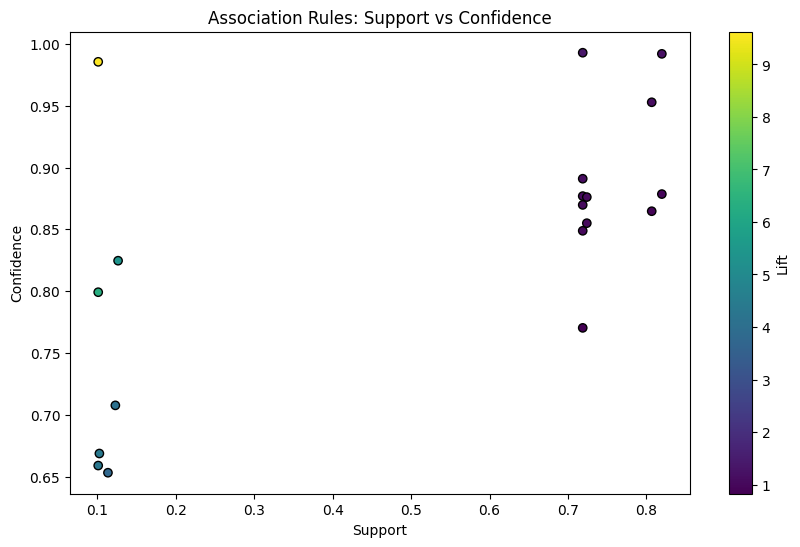

In [ ]:
# Plotting the association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', edgecolor='k')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.show()

To interpret the scatter plot provided, it is essential to understand what each axis and the color scale represent. The x-axis (**Support**) indicates how frequently the rule appears in the dataset; higher support means the rule applies to a more significant portion of the dataset. The y-axis (**Confidence)** measures the likelihood that the rule's conclusion is proper given the rule's condition; higher confidence means the rule is more reliable. The color scale (**Lift**) measures how often the rule's condition and conclusion occur together more than if they were independent. A lift value greater than 1 indicates a strong positive association.

**High Confidence and High Support:** Rules with high confidence and high support (top right corner) are reliable and broadly applicable. These rules indicate combinations of estrogen and progesterone receptor statuses that consistently predict survival outcomes.

**High Confidence and Low Support:** Rules with high confidence but low support (top left corner) are reliable but uncommon. These rules might highlight specific but rare combinations that predict survival outcomes well.

**High Lift Values:** Rules with high lift values (shown by colors towards the yellow end of the spectrum) indicate strong associations between the estrogen and progesterone receptor statuses and survival outcomes. These rules provide significant insights because these receptor statuses strongly affect the survival outcome.

**Therefore, the scatter plot shows that estrogen and progesterone receptor status combinations can significantly impact survival outcomes.** High lift and confidence rules, especially, highlight strong predictors. Positive receptor statuses likely contribute to better survival rates, while negative statuses might not be as straightforward due to lower prediction confidence. By analyzing these rules, researchers and clinicians can better understand the biological impact of receptor statuses on breast cancer survival, potentially guiding treatment decisions and further research.

### Feature Engineering

#### Data Preprocessing

For the feature engineering, we subtracted the age to the survival months to see at what the diagnosis was first made. We now then plot it in a histogram to see at what age do most patients are diagnosed.

In [ ]:
sorted_cancer['Age at Diagnosis'] = sorted_cancer['Age'] - (sorted_cancer['Survival_Months'] / 12)
sorted_cancer['Age at Diagnosis'] = sorted_cancer['Age at Diagnosis'].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Age at Diagnosis of women who have breast cancer')

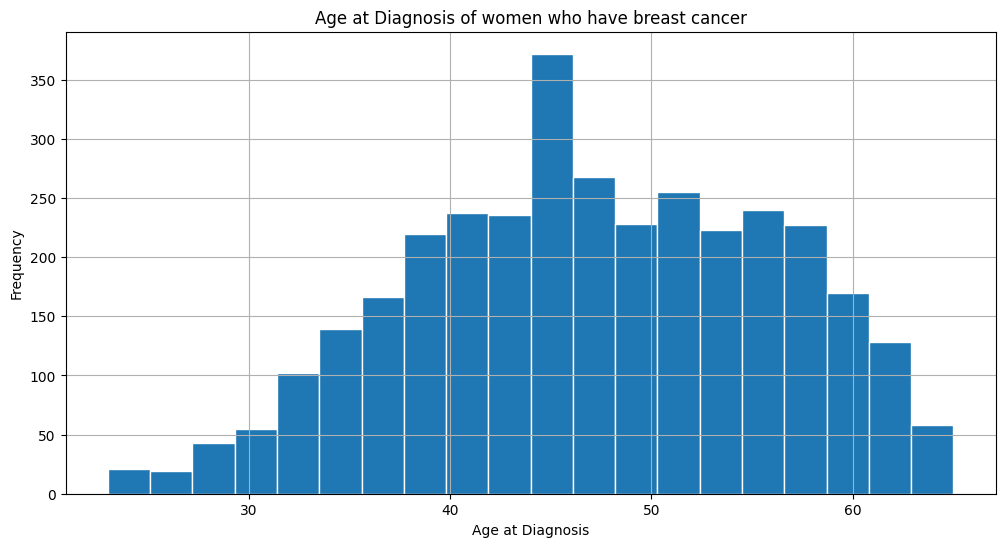

In [ ]:
sorted_cancer.hist('Age at Diagnosis', bins=20, edgecolor='w', figsize=(12,6))
plt.xlabel('Age at Diagnosis')
plt.ylabel('Frequency')
plt.title('Age at Diagnosis of women who have breast cancer')

After we plotted the datas into the histogram, we can see that the most frequent age where cancer is diagnosed is around 45 years old. The distribution shows an unimodal normal distribution.

# Statistical Inference

##Data Preprocessing

To facilitate the analysis, we categorize the survival status of patients into two groups: "Survived" and "Not_Survived." This categorization is based on whether the `Status` column contains the string 'Alive'.

In [ ]:
# Filter the DataFrame to include only rows where Status contains 'Dead'
complete_cancer = cancer.sort_values('Age')
complete_cancer.head()

complete_cancer['Survival_Outcome'] = complete_cancer['Status'].apply(
    lambda x: 'Survived' if 'Alive' in x else 'Not_Survived'
)

# Display the first few rows to verify the new column with a clear table format
print("Verification of Survival_Outcome Column:")
display(complete_cancer[['Status', 'Survival_Outcome']].head(10))

Verification of Survival_Outcome Column:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Status,Survival_Outcome
1544,Alive,Survived
702,Alive,Survived
3310,Alive,Survived
1888,Dead,Not_Survived
938,Dead,Not_Survived
1663,Alive,Survived
1668,Alive,Survived
66,Dead,Not_Survived
3711,Dead,Not_Survived
1320,Dead,Not_Survived


## Test of Independence

**Hypotheses:**

**`Null Hypothesis (H0)`**: There is no significant association between progesterone and estrogen status in determining the survival outcome.

**`Alternative Hypothesis (Ha)`**: There is a significant association between progesterone and estrogen status in determining the survival outcome.

**Decision Rule:**

Reject the null hypothesis (H0) if p < a

Where:
- p = The probability that the observed data would occur if the null hypothesis were true.
- a = The significance level (0.05)

In [ ]:
# Create the contingency table
contingency_table = pd.crosstab(
    [complete_cancer['Estrogen_Status'], complete_cancer['Progesterone_Status']],
    complete_cancer['Survival_Outcome']
)

# Display the contingency table
print("Contingency Table:")
display(contingency_table)

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")

# Display the expected frequencies
print("Expected Frequencies:")
display(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

# Decision rule
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis (H0). There is a significant association between progesterone and estrogen status in determining the survival outcome.")
else:
    print("Fail to reject the null hypothesis (H0). There is no significant association between progesterone and estrogen status in determining the survival outcome.")


Contingency Table:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Survival_Outcome                     Not_Survived  Survived
Estrogen_Status Progesterone_Status                        
Negative        Negative                      102       140
                Positive                        6        21
Positive        Negative                      102       354
                Positive                      406      2892

Chi-square Statistic: 175.8240572481763
P-value: 7.034279204171858e-38
Degrees of Freedom: 3
Expected Frequencies:


Survival_Outcome                     Not_Survived     Survived
Estrogen_Status Progesterone_Status                           
Negative        Negative                37.054934   204.945066
                Positive                 4.134228    22.865772
Positive        Negative                69.822521   386.177479
                Positive               504.988317  2793.011683

Reject the null hypothesis (H0). There is a significant association between progesterone and estrogen status in determining the survival outcome.


**P-Value:** $7.034279204171858\times10^{-38}$

Based on the results above, we reject the null hypothesis and concluded that there is a significant association between the progesterone and estrogren status in determining the survival outcome.

# Insights

## Data Binning Process
Data binning was used to categorize the survival months of breast cancer patients into two groups to simplify the analysis by grouping similar data points together. After finding the median value of the `Survival_Months` column (77.0 months), patients with survival times that are less than or equal to the median were categorized as **“Short”**, while those with survival times greater than the median were categorized as **“Long.”** There are 1654 long survivors and 1753 short survivors.

## Feature Engineering
We made use of feature engineering in order to derive new insights for already existing data, which can enhance the model's ability to predict survival outcomes. After the `Age at Diagnosis `feature was created by subtracting the survival months from the age of the patient to the time of data collection, we were able to plot a histogram to visualize the distribution of the feature. The unimodal normal pattern of the distribution revealed that the most frequent age for breast cancer diagnosis was around **45 years old**.

## Association Rule Mining
Our adoption of association rule mining has illustrated clear patterns and association within our chosen data set. Particularly, the combination of estrogen and progesterone receptor statuses showed influence on survival outcomes. The transactional data analysis, focusing on survival outcomes categorized as `Survived` or `Not_Survived` has been insightful as it simplifies complex clinical data, providing clearer insights into treatment effectiveness and patient prognosis. Moreover, applying the Apriori algorithm and subsequent rule analysis using confidence and lift metrics provided a strong set of association rules that underscore the dependency of survival outcomes on receptor statuses.

# Conclusion

In the statistical analysis, we tested the association between estrogen and progesterone receptor statuses and survival outcomes in breast cancer patients. After preprocessing the data to include relevant statuses, we formulated hypotheses to determine if a significant association exists. Our null hypothesis posited no association, while the alternative hypothesis suggested a substantial link between receptor statuses and survival outcomes.

Using a chi-square test of independence on the contingency table, we found a chi-square statistic significantly higher than expected under the null hypothesis, with a p-value of $7.034279204171858\times10^{-38}$. This significantly low p-value led us to reject the null hypothesis, confirming a statistically significant association between the estrogen and progesterone statuses and survival outcomes.

The conclusive evidence from this analysis underscores the importance of these hormonal receptors in influencing the prognosis of breast cancer patients. This finding could guide more tailored treatment strategies and influence clinical practices, improving patient management and survival rates.
